# Assignment 2 - Probability

## 1a. Tossing a Coin 10,000 Times
We simulate tossing a fair coin 10,000 times using Python's `random` module and compute the experimental probability of heads and tails.

In [5]:

import random

trials = 10000
heads = 0
tails = 0

for _ in range(trials):
    toss = random.choice(["H", "T"])
    if toss == "H":
        heads += 1
    else:
        tails += 1

print("Experimental Probability of Heads:", heads / trials)
print("Experimental Probability of Tails:", tails / trials)


Experimental Probability of Heads: 0.4941
Experimental Probability of Tails: 0.5059


## 1b. Rolling Two Dice
We roll two dice 10,000 times and compute the probability of getting a sum of 7.

In [6]:

trials = 10000
count_sum7 = 0

for _ in range(trials):
    die1 = random.randint(1, 6)
    die2 = random.randint(1, 6)
    if die1 + die2 == 7:
        count_sum7 += 1

print("Experimental Probability of Sum=7:", count_sum7 / trials)


Experimental Probability of Sum=7: 0.1678


## 2. Probability of At Least One '6' in 10 Rolls
We simulate rolling a die 10 times per trial and check if at least one roll is a 6.

In [7]:

def prob_at_least_one_six(trials=10000):
    success = 0
    for _ in range(trials):
        rolls = [random.randint(1, 6) for _ in range(10)]
        if 6 in rolls:
            success += 1
    return success / trials

print("Probability of at least one 6 in 10 rolls:", prob_at_least_one_six())


Probability of at least one 6 in 10 rolls: 0.8342


## 3. Conditional Probability and Bayes' Theorem
We simulate drawing balls from a bag with 5 red, 7 green, and 8 blue balls, repeated 1000 times with replacement.

In [8]:

import numpy as np

colors = ["R"] * 5 + ["G"] * 7 + ["B"] * 8
trials = 1000
draws = []

for _ in range(trials):
    ball = random.choice(colors)
    draws.append(ball)

# P(Red | previous Blue)
count_prev_blue = 0
count_red_given_blue = 0

for i in range(1, trials):
    if draws[i-1] == "B":
        count_prev_blue += 1
        if draws[i] == "R":
            count_red_given_blue += 1

prob_red_given_blue = count_red_given_blue / count_prev_blue
print("P(Red | Previous Blue):", prob_red_given_blue)

# Bayes' theorem verification
p_red = draws.count("R") / trials
p_blue = draws.count("B") / trials

# P(Blue|Red)
count_prev_red = 0
count_blue_given_red = 0
for i in range(1, trials):
    if draws[i-1] == "R":
        count_prev_red += 1
        if draws[i] == "B":
            count_blue_given_red += 1

p_blue_given_red = count_blue_given_red / count_prev_red

# Bayes formula
p_red_given_blue_bayes = (p_blue_given_red * p_red) / p_blue
print("Bayes Theorem (P(Red|Blue)):", p_red_given_blue_bayes)


P(Red | Previous Blue): 0.21534653465346534
Bayes Theorem (P(Red|Blue)): 0.22277227722772275


## 4. Discrete Random Variable
We generate a sample of size 1000 from a discrete RV with probabilities: P(X=1)=0.25, P(X=2)=0.35, P(X=3)=0.40.

In [9]:

values = [1, 2, 3]
probabilities = [0.25, 0.35, 0.40]

sample = np.random.choice(values, size=1000, p=probabilities)

print("Empirical Mean:", np.mean(sample))
print("Empirical Variance:", np.var(sample))
print("Empirical Std Dev:", np.std(sample))


Empirical Mean: 2.139
Empirical Variance: 0.6296790000000001
Empirical Std Dev: 0.7935231565619242


## 5. Continuous Random Variable (Exponential Distribution)
We generate 2000 samples from an exponential distribution with mean=5 and plot histogram + PDF overlay.

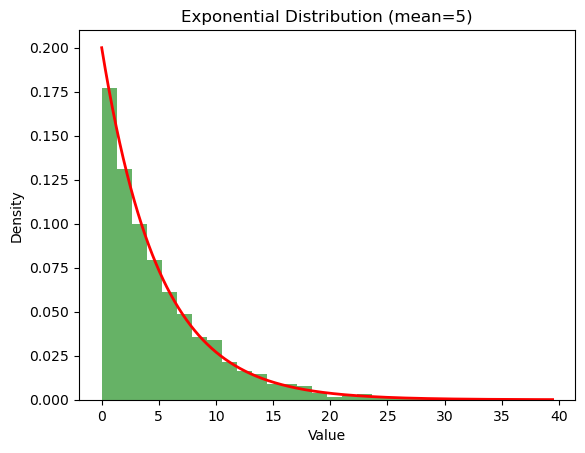

In [10]:

import matplotlib.pyplot as plt
from scipy.stats import expon

samples = np.random.exponential(scale=5, size=2000)

plt.hist(samples, bins=30, density=True, alpha=0.6, color='g')

x = np.linspace(0, max(samples), 1000)
plt.plot(x, expon.pdf(x, scale=5), 'r-', lw=2)
plt.title("Exponential Distribution (mean=5)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()


## 6. Central Limit Theorem
We simulate the CLT using uniform distribution and visualize the distribution of sample means.

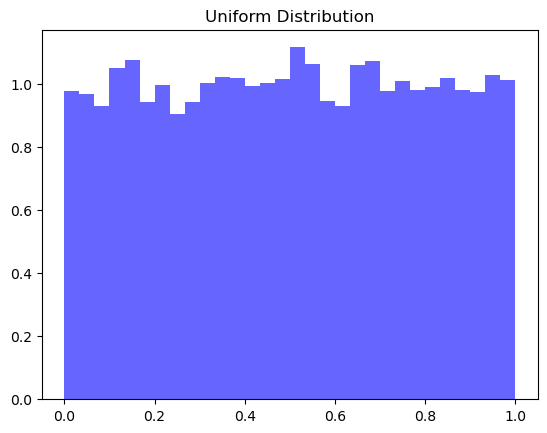

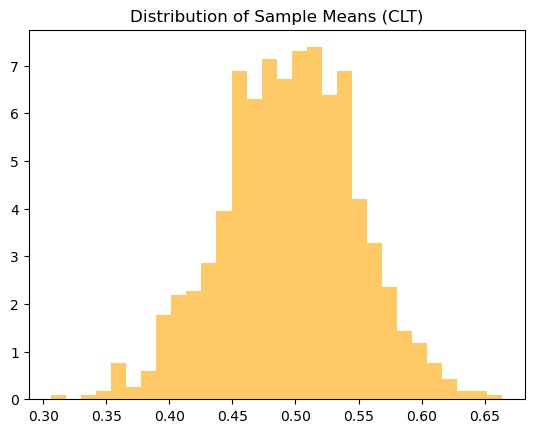

In [11]:

# Step a: generate 10,000 uniform numbers
uniform_samples = np.random.uniform(0, 1, 10000)

plt.hist(uniform_samples, bins=30, density=True, alpha=0.6, color='b')
plt.title("Uniform Distribution")
plt.show()

# Step b: draw 1000 samples of size n=30
means = []
for _ in range(1000):
    sample = np.random.uniform(0, 1, 30)
    means.append(np.mean(sample))

# Step c: visualize distribution of sample means
plt.hist(means, bins=30, density=True, alpha=0.6, color='orange')
plt.title("Distribution of Sample Means (CLT)")
plt.show()
